### **Project 1 : Using chemical analysis to determine the quality wines** 

In [0]:
# Import modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [0]:
# Import dataset
df = pd.read_csv("https://raw.githubusercontent.com/mp-rocha/data-projects/master/redwine-quality-predict/winequality.csv", sep = ';')

---

>#### **1) Checking and understanding the data**

---

*   Checking data format
*   Checking missing data
*   Checking for hidden data

---

In [3]:
# Checking the data format
print('Numbers of lines and columns: {0}'.format(df.shape))
print('\n')
print(df.head())
print('\n')
print(df.info())
print('\n')

Numbers of lines and columns: (1599, 12)


   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density    

In [4]:
# Checking missing datas

print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


---

>#### **2) Preprocessing data**
---
*   Treating hidden missing values
---

In [5]:
# Find hidden missing values

print("Number of hidden missing values in citric acid variable: ", df["citric acid"].loc[df["citric acid"] == 0].count())

Number of hidden missing values in citric acid variable:  132


In [0]:
# Treating hidden missing values
# Substituting values equal zero by the mean of column.

from sklearn.impute import SimpleImputer
hidden = SimpleImputer(missing_values = 0, strategy = "mean")

df['citric acid'] =  hidden.fit_transform(df[['citric acid']])

In [7]:
# Checking if exist any hidden values

print("Number of hidden missing values in citric acid variable: ", df["citric acid"].loc[df["citric acid"] == 0].count())

Number of hidden missing values in citric acid variable:  0


---

>#### **3) Exploratory data analysis**

---

*   Describe data
*   Distribution of 'quality' variable
*   Correlation matrix
*   Violin plot to understand variance of data
*   Analyze the average of the variables in relation to the notes

---


In [8]:
# Describe data

print(df.describe())

       fixed acidity  volatile acidity  ...      alcohol      quality
count    1599.000000       1599.000000  ...  1599.000000  1599.000000
mean        8.319637          0.527821  ...    10.422983     5.636023
std         1.741096          0.179060  ...     1.065668     0.807569
min         4.600000          0.120000  ...     8.400000     3.000000
25%         7.100000          0.390000  ...     9.500000     5.000000
50%         7.900000          0.520000  ...    10.200000     6.000000
75%         9.200000          0.640000  ...    11.100000     6.000000
max        15.900000          1.580000  ...    14.900000     8.000000

[8 rows x 12 columns]


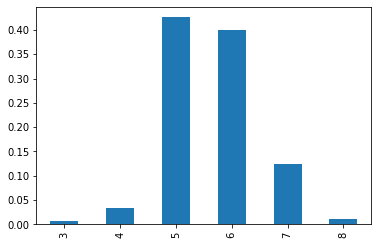

In [9]:
df['quality'].value_counts(normalize=True, sort=False).plot.bar()

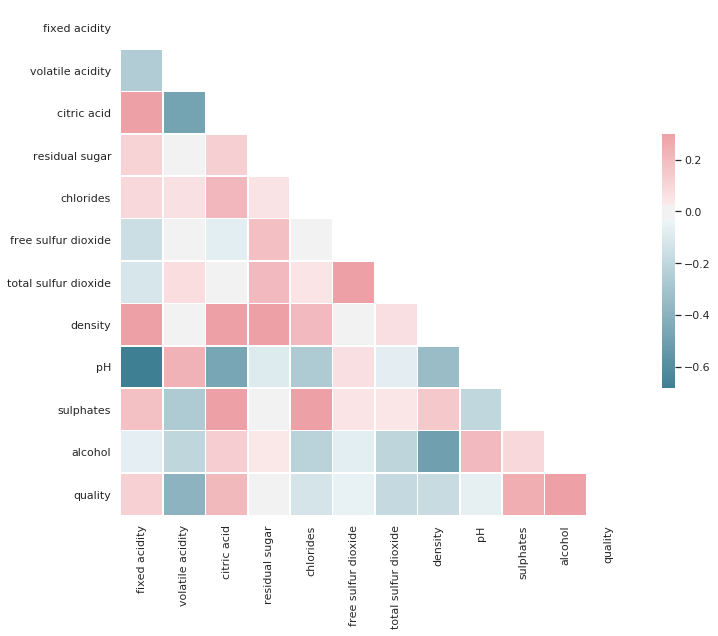

In [10]:
import seaborn as sns

sns.set(style="white")
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.tight_layout()

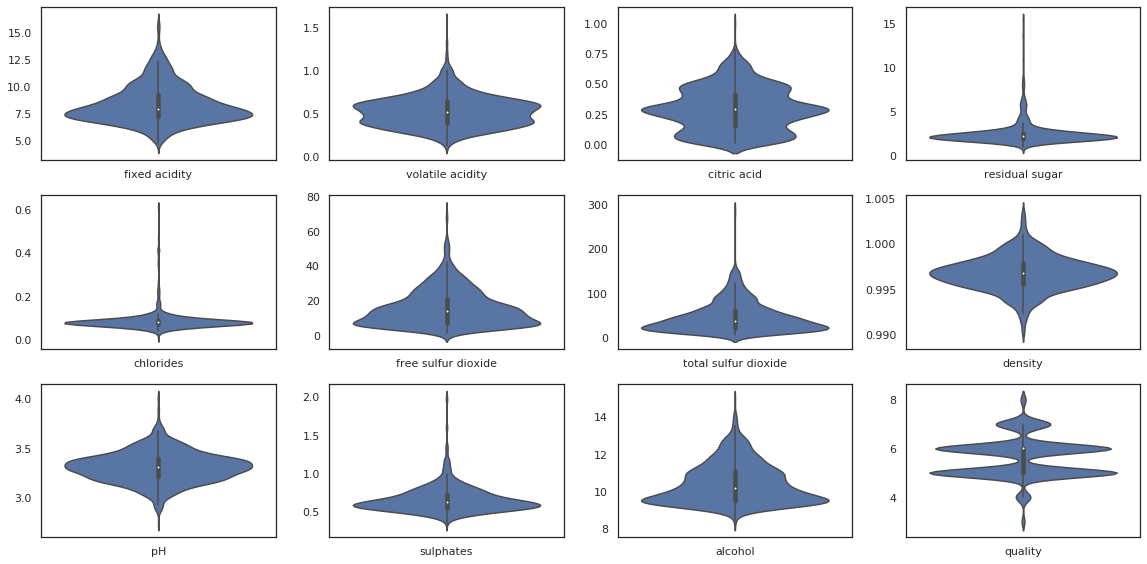

In [11]:
import pandas as pd
fig = plt.figure(figsize=(16,8))
for i, col in enumerate(df.columns):
    ax=plt.subplot(3,4,i+1) 
    sns.violinplot(data=df[[col]])
plt.tight_layout()

In [12]:
quality_df = df.groupby("quality")[df.columns].agg('median')
quality_df.drop(['quality'], axis=1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,7.50,0.845,0.295358,2.1,0.0905,6.0,15.0,0.997565,3.39,0.545,9.925
4,7.50,0.670,0.240000,2.1,0.0800,11.0,26.0,0.996500,3.37,0.560,10.000
5,7.80,0.580,0.260000,2.2,0.0810,15.0,47.0,0.997000,3.30,0.580,9.700
6,7.90,0.490,0.295358,2.2,0.0780,14.0,35.0,0.996560,3.32,0.640,10.500
7,8.80,0.370,0.400000,2.3,0.0730,11.0,27.0,0.995770,3.28,0.740,11.500
8,8.25,0.370,0.420000,2.1,0.0705,7.5,21.5,0.994940,3.23,0.740,12.150


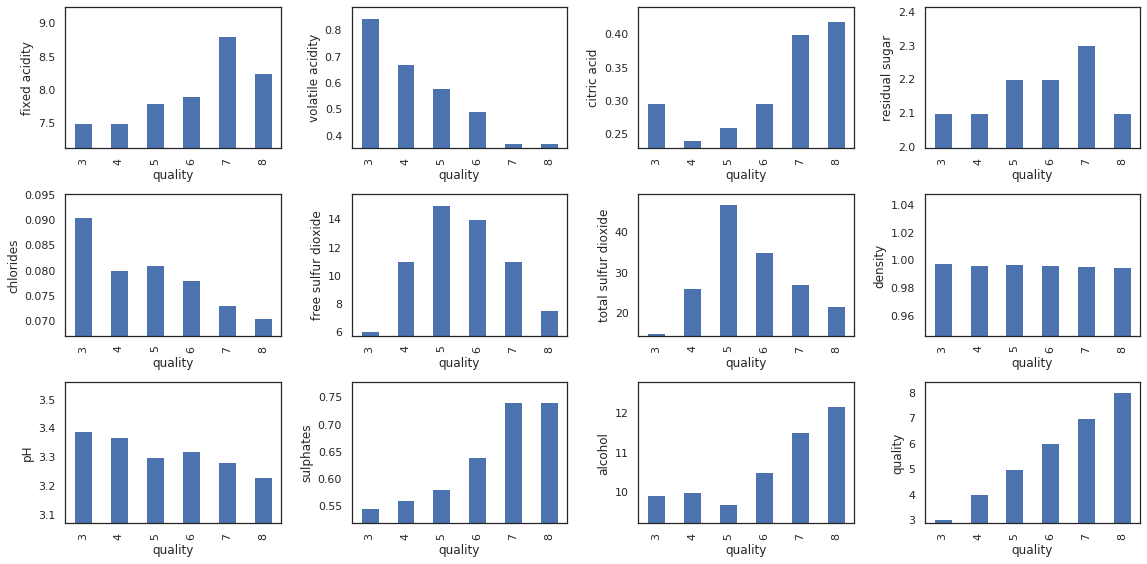

In [13]:
fig = plt.figure(figsize=(16,8))
for i, col in enumerate(quality_df.columns):
    ax=plt.subplot(3,4,i+1) 
    quality_df[col].plot.bar()
    plt.ylabel(col)
    ax.set_ylim([quality_df[col].min()-quality_df[col].min() *0.05,quality_df[col].max()+quality_df[col].max()*0.05])
plt.tight_layout()

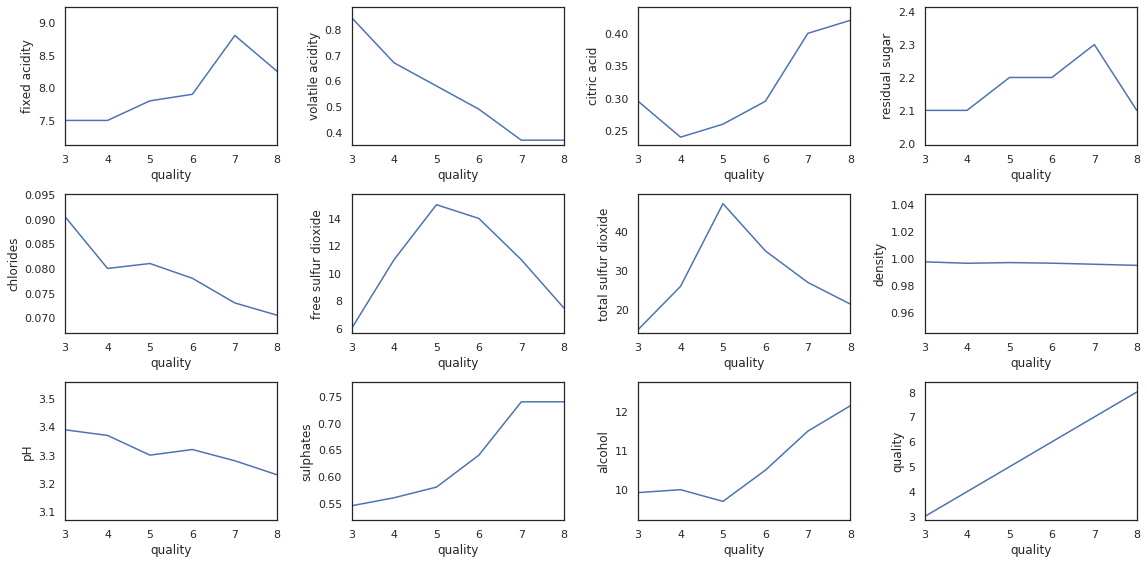

In [14]:
fig = plt.figure(figsize=(16,8))
for i, col in enumerate(quality_df.columns):
    ax=plt.subplot(3,4,i+1) 
    quality_df[col].plot()
    plt.ylabel(col)
    ax.set_ylim([quality_df[col].min()-quality_df[col].min() *0.05,quality_df[col].max()+quality_df[col].max()*0.05])
plt.tight_layout()

---

>#### **4) Defining variables, metrics and splitting data**

---


*   Defining exploratory variable
*   Defining target variable
*   Metrics: Accuracy
*   Splitting dataset


---


In [0]:
# Exploratory variable
X = df.drop('quality', axis=1)

# Target variable
y = df[['quality']]

In [0]:
# Splitting of data - 75% for training data and 25% for test data
# Importing the train_test_split
from sklearn.model_selection import train_test_split

# Setting split rate using train_test_split
split_test_size = 0.25

# Creating test data and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = split_test_size, random_state = 42)

In [17]:
# Printing results

print("{0:0.2f}% in data train.".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% in data test.".format((len(X_test)/len(df.index)) * 100))

74.98% in data train.
25.02% in data test.


---

>#### **5) Construct a baseline and simple models**

---
*   As approximately 42% of all wine notes in the data set receive a score of 5
*   Minimum defined baseline: 42%
*   Train classifier models

---

In [18]:
# Creating a first simple models to predict quality wine.

def model(X_train, y_train, X_test, y_test):
    
    # Importing models
    from sklearn.linear_model import RidgeClassifier, SGDClassifier
    from sklearn.svm import LinearSVC, SVC
    from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
    from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier 
    from xgboost import XGBClassifier
    from sklearn.metrics import accuracy_score


    models = [RidgeClassifier(), SGDClassifier(), LinearSVC(), SVC(), DecisionTreeClassifier(), ExtraTreeClassifier(),                                      AdaBoostClassifier(), BaggingClassifier(), GradientBoostingClassifier(), RandomForestClassifier(), XGBClassifier()]

    models_name = ["RidgeClassifier", "SGDClassifier", "LinearSVC", "SVC", "DecisionTreeClassifier", "ExtraTreeClassifier",                                      "AdaBoostClassifier", "BaggingClassifier", "GradientBoostingClassifier", "RandomForestClassifier", "XGBClassifier"]
    

    # Looop for training all models
    valor = []

    for i in models:
        model = i
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        valor.append(acc)
        results = pd.DataFrame(list(zip(models_name, valor)), columns=["Model", "Accuracy"])
    
    return results.sort_values(by=['Accuracy'], ascending=False)

model(X_train, y_train, X_test, y_test)

,Model,Accuracy
7,BaggingClassifier,0.6750
9,RandomForestClassifier,0.6725
8,GradientBoostingClassifier,0.6425
5,ExtraTreeClassifier,0.6075
10,XGBClassifier,0.6075
4,DecisionTreeClassifier,0.5700
0,RidgeClassifier,0.5675
6,AdaBoostClassifier,0.5225
3,SVC,0.5100
2,LinearSVC,0.4975


>#### **6) Finding the best model**

#### 6.1) Feature engeneering

*  Cross-valid
*  Standard Scalar
*  Reduce classes



In [19]:
# Top 3 Models - BaggingClassifier, GradientBoosting, RandomForest

# Cross Validation

from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import cross_val_score

bagging_model = BaggingClassifier()
gboost_model = GradientBoostingClassifier()
ranfo_model = RandomForestClassifier()

crosses_models = [bagging_model, gboost_model, ranfo_model]

for i in crosses_models:
    scores = cross_val_score(i, X_train, y_train, cv=5)
    print("Score: ", scores.mean())

Score:  0.643068340306834
Score:  0.638057880055788
Score:  0.6772733612273362


In [0]:
# Standard Scalar

from sklearn.preprocessing import StandardScaler

standard = StandardScaler()
X_train_stand = standard.fit_transform(X_train)
X_test_stand = standard.fit_transform(X_test)

In [21]:
model(X_train_stand, y_train, X_test_stand, y_test)

,Model,Accuracy
7,BaggingClassifier,0.6350
9,RandomForestClassifier,0.6325
3,SVC,0.6175
10,XGBClassifier,0.6000
4,DecisionTreeClassifier,0.5875
8,GradientBoostingClassifier,0.5850
0,RidgeClassifier,0.5675
2,LinearSVC,0.5675
5,ExtraTreeClassifier,0.5200
6,AdaBoostClassifier,0.5200


In [0]:
# Creating classes of quality
# 1-4 = Bad wines
# 5-6 = Medium wines
# 7-10 = Good wines

# Defining the intervals in which the quality classes will be added in train data
quality_bins_train = [0, 4, 6, 10]
quality_labels_train = ["Low", "Med", "High"]

#Converting the numerical variable ["quality"] to categorical variable in train data
y_train['quality'] = pd.cut(y_train['quality'], quality_bins_train, labels=quality_labels_train, 
    right=True, include_lowest=True)

# Defining the intervals in which the age classes will be added in test data
quality_bins_test = [0, 4, 6, 10]
quality_labels_test = ["Low", "Med", "High"]

#Converting the numerical variable ["Age"] to categorical variable in test data
y_test['quality'] = pd.cut(y_test['quality'], quality_bins_test, labels=quality_labels_test, 
    right=True, include_lowest=True)

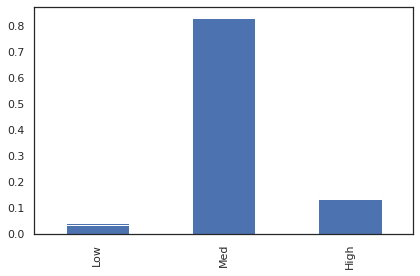

In [23]:
y_train['quality'].value_counts(normalize=True, sort=False).plot.bar()
y_test['quality'].value_counts(normalize=True, sort=False).plot.bar()
plt.tight_layout()

In [24]:
# Train the model again with 3 target variable

model(X_train_stand, y_train, X_test_stand, y_test)

,Model,Accuracy
9,RandomForestClassifier,0.8700
3,SVC,0.8575
10,XGBClassifier,0.8475
2,LinearSVC,0.8450
0,RidgeClassifier,0.8425
7,BaggingClassifier,0.8350
1,SGDClassifier,0.8300
8,GradientBoostingClassifier,0.8175
4,DecisionTreeClassifier,0.8025
5,ExtraTreeClassifier,0.7575


> #### **7) Resume**


* It was possible to notice that variables such as sulfates, alcohol and citric acid have a positive correlation with quality.

* Therefore, on average, the best wines have a high content of alcohol, sulfates and citric acid.

* As variables pH, chlorides, volatile acidity have a negative correlation, therefore, on average, their levels in a quality wine are lower.

* Regarding the premeditated model, Random Forest with standardized data uses the best results when using a wine note forecasting algorithm.

* Random forest accuracy: 86.25%

* Unfortunately, the data set has little data to reproduce as notes in a similar proportion, or that impairs the training of the model because there is little information contained mainly in notes 3, 4, 7, 8.


